<a href="https://colab.research.google.com/github/laurlouie/Seattle-Weather/blob/main/DATA_3320_Complete_Analysis_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Introduction

Just recently I had a friend who studies at NYU (New York University) visit me in Seattle. We talked about the weather and debated on which city has more rain than the other. Coincidentally, the purpose of this project is to try and convince Professor Egan's family from New York City to visit Seattle since they refuse to visit due to the rain. By using data science methodology, this project is designed to craft some visualizations and help come to a conclusion.

Using data provided by the National Centers for Environmental Information, two original datasets called seattle_rain.csv and ny_rain.csv (both found in the github repository here https://github.com/laurlouie/Seattle-Weather/tree/main ) were provided by Professor Egan at the beginning of the project.After carefully cleaning the data, this part of the project is aimed at creating visualizations to add evidence to our claims.



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style='whitegrid')
import missingno as msno

## Load clean data

In [17]:
clean_data = pd.read_csv('https://raw.githubusercontent.com/laurlouie/Seattle-Weather/main/clean_seattle_nyc_weather%20(3).csv')
clean_data

,date,city,precipitation,month,year
0,2020-01-01,NYC,0.013333,1,2020
1,2020-01-02,NYC,0.000000,1,2020
2,2020-01-03,NYC,0.134444,1,2020
3,2020-01-04,NYC,0.200000,1,2020
4,2020-01-05,NYC,0.040000,1,2020
...,...,...,...,...,...
2917,2023-12-27,SEA,0.063333,12,2023
2918,2023-12-28,SEA,0.240000,12,2023
2919,2023-12-29,SEA,0.055000,12,2023
2920,2023-12-30,SEA,0.042500,12,2023


In [4]:
# Checking to ensure all Dtypes are correct before needing to update
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2922 entries, 0 to 2921
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           2922 non-null   object 
 1   city           2922 non-null   object 
 2   precipitation  2922 non-null   float64
 3   month          2922 non-null   int64  
 4   year           2922 non-null   int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 114.3+ KB


In [18]:
# Changing "date" variable to correct data type
clean_data["date"] = pd.to_datetime(clean_data["date"])
# Checking to ensure all Dtypes are correct
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2922 entries, 0 to 2921
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           2922 non-null   datetime64[ns]
 1   city           2922 non-null   object        
 2   precipitation  2922 non-null   float64       
 3   month          2922 non-null   int64         
 4   year           2922 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 114.3+ KB


In [7]:
clean_data.groupby(by='city').describe()

date                                                                 \
     count                 mean                  min                  25%   
city                                                                        
NYC   1461  2021-12-31 00:00:00  2020-01-01 00:00:00  2020-12-31 00:00:00   
SEA   1461  2021-12-31 00:00:00  2020-01-01 00:00:00  2020-12-31 00:00:00   

                                                                          \
                      50%                  75%                  max  std   
city                                                                       
NYC   2021-12-31 00:00:00  2022-12-31 00:00:00  2023-12-31 00:00:00  NaN   
SEA   2021-12-31 00:00:00  2022-12-31 00:00:00  2023-12-31 00:00:00  NaN   

     precipitation            ... month              year               \
             count      mean  ...   max       std   count         mean   
city                          ...                                        
NYC         1461.0  0.133579  ...  12.0  3.449884  1461.0  2021.498973   
SEA         1461.0  0.115901  ...  12.0  3.449884  1461.0  2021.498973   

                                                        
         min     25%     50%     75%     max       std  
city                                                    
NYC   2020.0  2020.0  2021.0  2022.0  2023.0  1.118723  
SEA   2020.0  2020.0  2021.0  2022.0  2023.0  1.118723  

[2 rows x 32 columns]

Even though the summary statistics above describes the average precipitation amount for each city, this may not necessarily help our analysis as the mean is not the best for statistic when coming to a conclusion. In fact, a median may be more helpful.

## Questions

The overall problem is to compare how much it rains in Seattle and New York City. To answer this general problem, this project will need to ask specific questions about the data.


Specific questions to answer about the data


1.   Are there any extreme rainfall events or outliers in the data for either city?
2.   Which city holds the most frequency in rainy days?
3.   How does the time of year in each city effect the average rainfall?

## Analysis

In [8]:
threshold = 2  # Adjust this threshold amount according to your definition of extreme rainfall

extreme_rainfall_events = clean_data[clean_data ['precipitation'] > threshold]

if extreme_rainfall_events.empty:
    print("No extreme rainfall events found.")
else:
    print("The extreme rainfall events found:")
    print(extreme_rainfall_events)


The extreme rainfall events found:
           date city  precipitation  month  year
555  2021-07-09  NYC       2.366429      7  2021
600  2021-08-23  NYC       2.795000      8  2021
610  2021-09-02  NYC       4.244615      9  2021
664  2021-10-26  NYC       2.112857     10  2021
665  2021-10-27  NYC       2.027857     10  2021
1367 2023-09-29  NYC       2.541538      9  2023
1368 2023-09-30  NYC       2.373077      9  2023
1440 2023-12-11  NYC       2.009333     12  2023
1447 2023-12-18  NYC       2.099231     12  2023
2895 2023-12-05  SEA       2.710000     12  2023


Based on this threshold of 2 (indicating values above 2 inches), the results above show the extreme rainfall events found within the four years of data. As you can see, Seattle is only mentioned once while New York City is mentioned in all other entries. Since the threshold can be adjusted, I believe the audience can adjust the number based on what they believe an extreme amount of rain is.

I chose to use the threshold as 2 because I wanted to use a number that was familiar in the sense of measuring rain (as someone with hardly any experience in this field). I grew up in the San Francisco Bay Area, and I rememember having to leave my "portable" classroom to the hallway of the school building becuase the rain was really heavy that day. When I got home later that day, I asked my mom how much rain we got, and she said around 2 inches total. It was crazy to me that we had to evacuate our class to head for shelter, all for just 2 inches of rain. From that day forward, that has been my idea of "a rainy day".

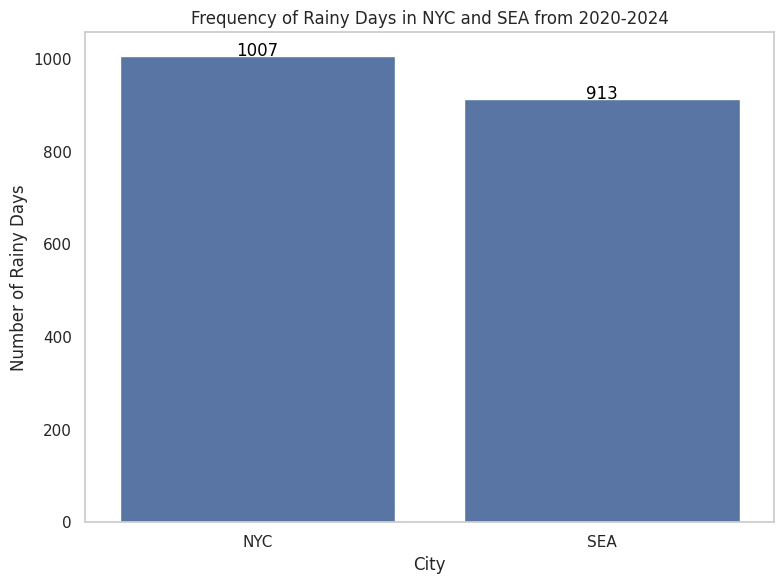

In [16]:
clean_data['rainy_day'] = clean_data['precipitation'] > 0

# Group by city and count the number of rainy days
rainy_days_count = clean_data.groupby('city')['rainy_day'].sum().reset_index()

plt.figure(figsize=(8, 6))
sns.barplot(x='city', y='rainy_day', data=rainy_days_count)
plt.title('Frequency of Rainy Days in NYC and SEA from 2020-2024')
plt.xlabel('City')
plt.ylabel('Number of Rainy Days')
plt.grid(axis='y')

# Annotating bars with the frequency numbers
for index, row in rainy_days_count.iterrows():
    plt.text(index, row['rainy_day'], f"{row['rainy_day']}", color='black', ha="center")

plt.tight_layout()
plt.show()

The bar chart above answers the second question by finding the city that holds the most frequency in rainy days. According to the evidence, New York City (NYC) has the most frequency with a little less than 100 days more than Seattle. It is important to note that the first line of code creates a new column rainy_day in the data frame clean_data, where each entry is true if the corresponding value in the precipitation column is greater than the value 0, indicating a rainy day, and False if otherwise. The for loop essentially iterates over each row in the dataframe called rainy_days_count using the iterrows() method.

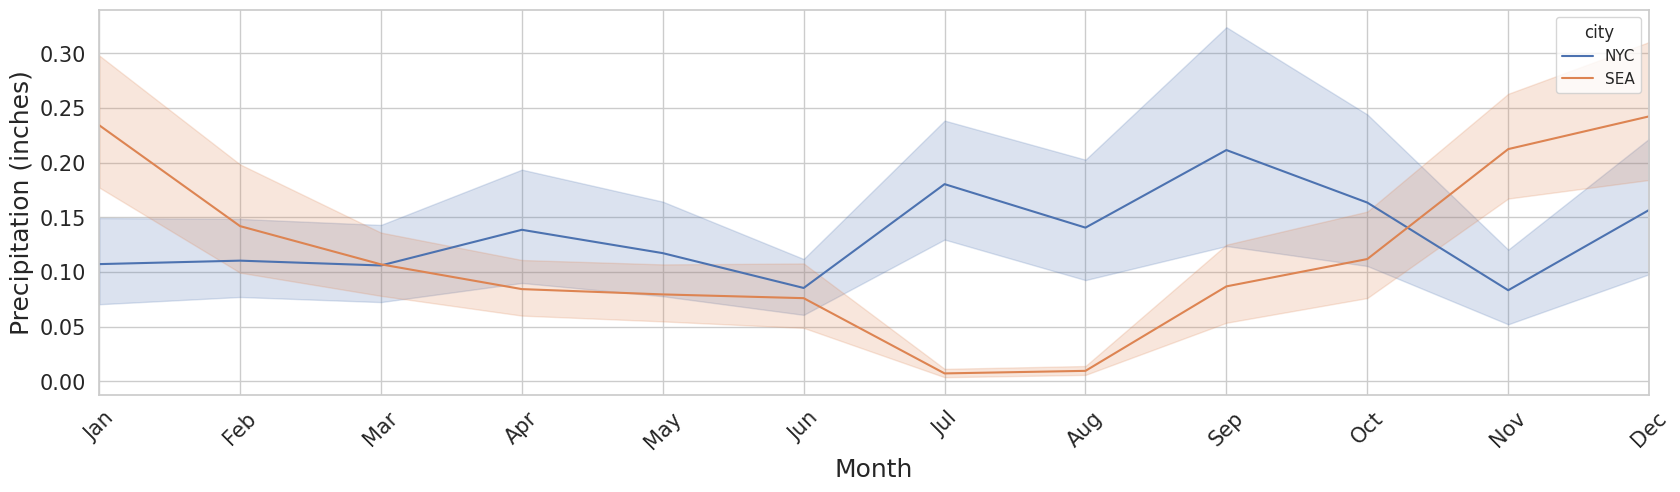

In [14]:
plt.figure(figsize=(20,5))

sns.lineplot(data=clean_data, x='month', y='precipitation', hue='city', errorbar="ci")

plt.xlabel('Month', fontsize=18)
plt.ylabel('Precipitation (inches)', fontsize=18)
plt.xticks(ticks=np.arange(12)+1, labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)
plt.xlim(1, 12)
plt.tick_params(labelsize=15)
plt.show()

The line plot above shows both cities with their respective frequencies over for the twelve months of the year. As you can notice, Seattle experiences a high frequency with high levels of precipitation (inches) on the y axis during the winter months while New York City experiences high frequency, yet low levels of rain in the late summer months.

## Conclusion

After creating some visualizations and answering the questions made earlier, I have found that New York City experiences more rainfall than Seatlte.

My first analysis shows some of the most signficiant rainfall dates throughout the four years of data between both cities. As mentioned, the threshold amount can vary based on the reader's choice, but I chose 2 (in inches) as it is a signficant number to me. Furthermore, the second analysis shows a bar chart that indicates a high frequency in the number of days each city experienced rain. New York City leads in that analysis as well. The last visualization shows that the average rainfall of New York City is greater than Seattle's from after January towards the beginning of October.

Overall, the evidence and anlysese provided above can convince Professor Egan's family to visit Seattle since it rains less than it does in New York City.
